### importando librerias

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### funcion que recibe dos imagenes y las dibuja en una matriz de 1 fila y dos columnas

In [7]:
def mostrar_imagenes(imagen1, imagenConvolucionada,tipoKernel):
    """
    Muestra la imagen original y la imagen filtrada en una única ventana.
    
    Args:
        imagen_original (numpy.ndarray): Imagen original.
        imagen_filtrada (numpy.ndarray): Imagen después de aplicar el filtro.
    """
    plt.figure(figsize=(10, 5))
    
    # Mostrar la imagen a color
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagen1, cv2.COLOR_BGR2RGB))
    plt.title('Imagen a color')
   
    # Mostrar la imagen convolucionada con el filtro
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(imagenConvolucionada, cv2.COLOR_BGR2RGB))
    plt.title(tipoKernel)
    
    plt.show()

### funcion que aplica la comvolucion segun el kernel enviado

In [8]:
def convolucion(imagen, kernel):
    # la funcion Filer2D aplica la convolucion segun kernel enviado de la imagen
    imagen_filtrada = cv2.filter2D(imagen, -1, kernel)
    
    return imagen_filtrada




### probando con diferentes filtros o kernels

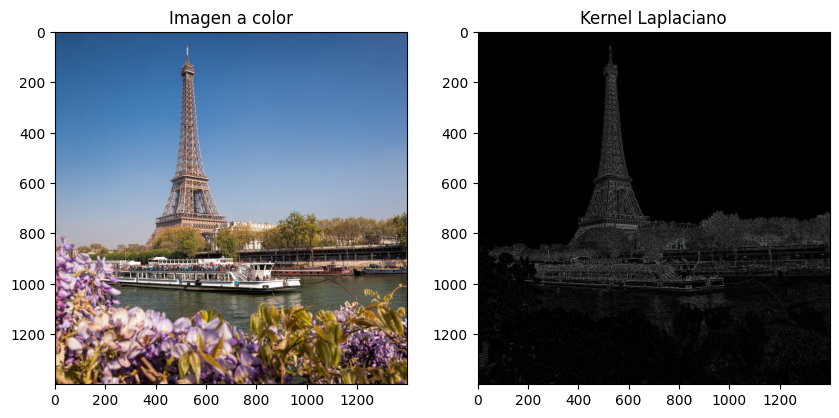

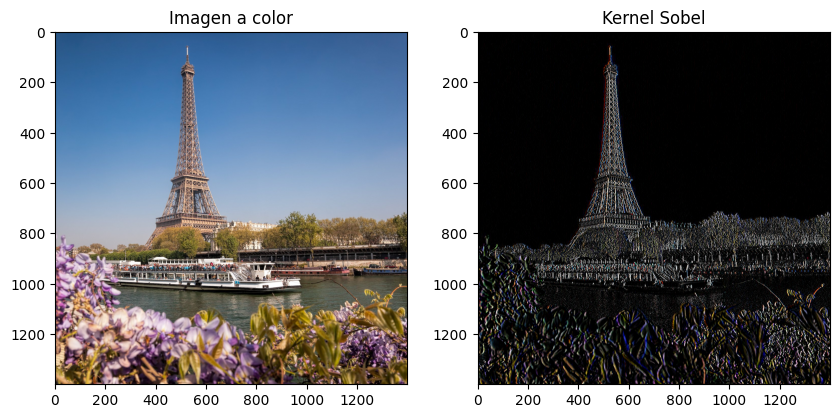

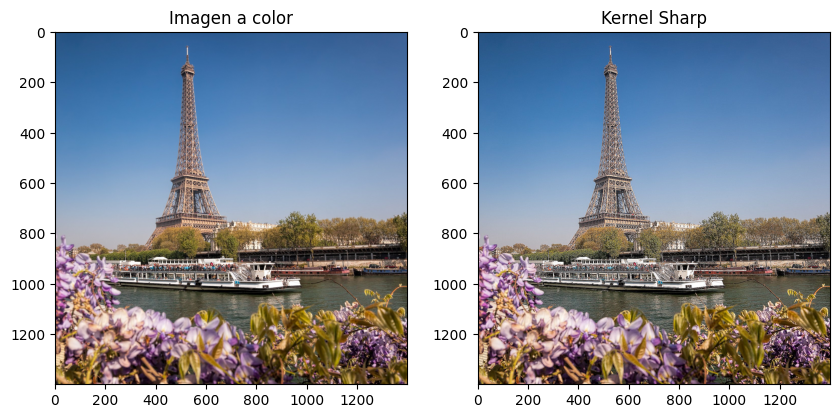

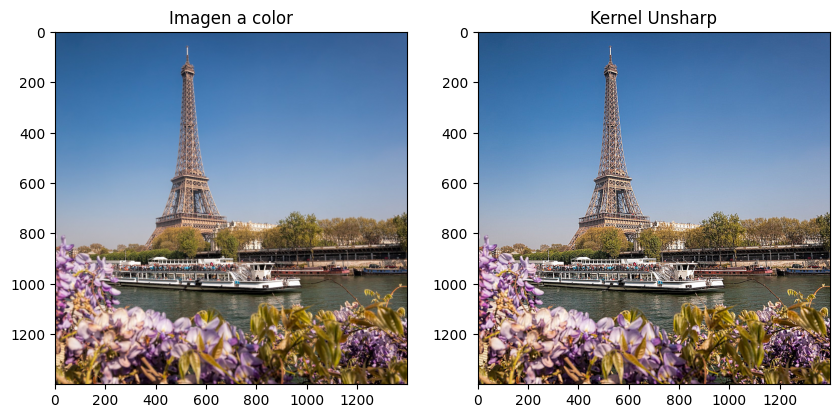

[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


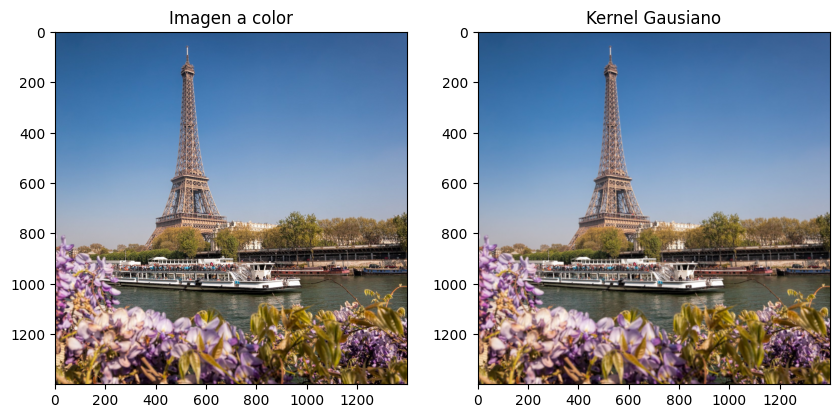

In [14]:
# Cargando la imagen a color
imagen = cv2.imread('paris.jpg')
# prueba con kernel laplaciano 3X3
kernelLaplaciano = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])
imagen2 = convolucion(imagen, kernelLaplaciano)
# Mostrar la imagen original y la imagen filtrada
mostrar_imagenes(imagen, imagen2,"Kernel Laplaciano")

#kernel Sobel
kernelSobel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
imagen2 = convolucion(imagen, kernelSobel)
# Mostrar la imagen original y la imagen filtrada
mostrar_imagenes(imagen, imagen2,"Kernel Sobel")

#kernel sharp
kernelSharp = np.array([[ 0, -1,  0],
                   [-1,  5, -1],
                   [ 0, -1,  0]])

imagen2 = convolucion(imagen, kernelSharp)
# Mostrar la imagen original y la imagen filtrada
mostrar_imagenes(imagen, imagen2,"Kernel Sharp")

#kernel unsharp
kernelunsharp = np.array([[-1, -1, -1, -1, -1],
                   [-1,  2,  2,  2, -1],
                   [-1,  2,  8,  2, -1],
                   [-1,  2,  2,  2, -1],
                   [-1, -1, -1, -1, -1]]) / 8

imagen2 = convolucion(imagen, kernelunsharp)
# Mostrar la imagen original y la imagen filtrada
mostrar_imagenes(imagen, imagen2,"Kernel Unsharp")

#kernel gaussiano  usando la funcion getGaussiankernel qu enos da kernles de tamaño Mxn segun le mandemos en este caso 3x3
kernel= cv2.getGaussianKernel(3,3)
kernelGaus = kernel @ kernel.T  # Crear kernel 2D gaussiano
print(kernelGaus)
imagen2 = convolucion(imagen, kernelGaus)
# Mostrar la imagen original y la imagen filtrada
mostrar_imagenes(imagen, imagen2,"Kernel Gausiano")

